In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D
import pickle

In [3]:
confidential = open("spotify_eddie_confidential.txt","r")

In [4]:
string = confidential.read()

In [5]:
st = string.split('\n')

In [6]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [8]:
df = sp.user_playlist_tracks("spotify", "0BUNSGihi2mrhQu3fPcVim")

In [9]:
# ''' What we need:
#  1) Get Playlist [x]
#  2) Get artist name from each song of the playlist
#  3) Get all albums from each of the artists                       #to do list credit to SEVEREIN
#  4) Get all songs from each of the albums
#  5) Get URI's for all the songs'''

In [10]:
df['items'][0]['track']['id']

'1SJ4ycWow4yz6z4oFz8NAG'

In [11]:
# for x in df['items']:
#     print(x['track']['id']) 

In [12]:
all_id = []
for x in df['items']:
    all_id.append(x['track']['id'])    #all 813 id's

In [13]:
# all audio features
#sp.audio_features(tracks=all_id)              #ignore this, as I have done it in a different way further down

In [14]:
#all_audio_features = pd.DataFrame(sp.audio_features(tracks=all_id))

In [15]:
#all_audio_features.head()

In [16]:
#all_audio_features.dtypes

In [17]:
#all_audio_features.columns

In [18]:
#sp.categories(limit=3)

In [19]:
df['total']

815

In [20]:
len(df['items'])

100

In [21]:
df.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [22]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [23]:
all_tracks = get_playlist_tracks("0BUNSGihi2mrhQu3fPcVim")  #get playlist tracks, takes some time
len(all_tracks)

815

In [24]:
all_tracks[0]['track']['artists'][0]['name']   #check name, track, artists 

'The Muppets'

In [25]:
def uris(all_tracks):
    uris = [all_tracks[i]['track']['uri'] for i in range(len(all_tracks))]   #uris
    return uris
all_uris = uris(all_tracks)

In [26]:
df_all_uris = pd.DataFrame(all_uris, columns=['uri'])      #uris data frame
df_all_uris.shape

(815, 1)

In [27]:
df_all_uris

,uri
0,spotify:track:1SJ4ycWow4yz6z4oFz8NAG
1,spotify:track:25U7raB3ZSszayTYClh4hF
2,spotify:track:04cdEVbQPb8BJb7593e5fO
3,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu
4,spotify:track:2pp3RfqX5cb1BAnmNi4Nej
...,...
810,spotify:track:6B89ADIwxCw60PHZN6Kdp4
811,spotify:track:7nXXIXFSyDDPlfzCW9bdAa
812,spotify:track:536L9C0N7vhYdibCJx3cI2
813,spotify:track:2eTjkXxxssJeR3u586CMkI


In [28]:
def all_artists(all_tracks):
    artist = [all_tracks[i]['track']['artists'][0]['name'] for i in range(len(all_tracks))]    #artists
    return artist  
all_artists = all_artists(all_tracks)

In [29]:
df_all_artists = pd.DataFrame(all_artists, columns=['artist'])         #artitst data frame
df_all_artists.shape

(815, 1)

In [30]:
df_all_artists

,artist
0,The Muppets
1,Israel Kamakawiwo'ole
2,Joey Ramone
3,Asaf Avidan & the Mojos
4,Louis Armstrong
...,...
810,Garfunkel and Oates
811,Shiny Toy Guns
812,Gordon Lightfoot
813,Blackmill


In [31]:
def all_track_names(all_tracks):
    names = [all_tracks[i]['track']['name'] for i in range(len(all_tracks))]      #tracks
    return names
all_track_names = all_track_names(all_tracks)

In [32]:
#all_track_names

In [33]:
df_all_track_names = pd.DataFrame(all_track_names, columns=['name'])          #tracks data frame
df_all_track_names.shape

(815, 1)

In [34]:
df_all_track_names

,name
0,Rainbow Connection
1,Somewhere Over The Rainbow_What A Wonderful World
2,What a Wonderful World
3,One Day / Reckoning Song (Wankelmut Remix) [Ra...
4,What A Wonderful World - Single Version
...,...
810,The Loophole
811,Major Tom (Coming Home) - Adam K & Soha Radio ...
812,The Wreck of the Edmund Fitzgerald
813,Fortune Soul


In [35]:
features = [sp.audio_features(i) for i in (all_uris)]         # WARNING this takes longer


In [36]:
 def flatten(input_list):
     return [item for sublist in input_list for item in sublist]

In [37]:
features_new = flatten(features) #check first one
features_new[0]

{'danceability': 0.526,
 'energy': 0.413,
 'key': 9,
 'loudness': -7.674,
 'mode': 1,
 'speechiness': 0.0278,
 'acousticness': 0.428,
 'instrumentalness': 0,
 'liveness': 0.126,
 'valence': 0.211,
 'tempo': 115.936,
 'type': 'audio_features',
 'id': '1SJ4ycWow4yz6z4oFz8NAG',
 'uri': 'spotify:track:1SJ4ycWow4yz6z4oFz8NAG',
 'track_href': 'https://api.spotify.com/v1/tracks/1SJ4ycWow4yz6z4oFz8NAG',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SJ4ycWow4yz6z4oFz8NAG',
 'duration_ms': 188933,
 'time_signature': 3}

In [38]:
#clean up everything to make a final features data frame

danceability = [features_new[i]['danceability'] for i in range(len(features_new))]
energy = [features_new[i]['energy'] for i in range(len(features_new))]
key = [features_new[i]['key'] for i in range(len(features_new))]
loudness = [features_new[i]['loudness'] for i in range(len(features_new))]
mode = [features_new[i]['mode'] for i in range(len(features_new))]
speechiness = [features_new[i]['speechiness'] for i in range(len(features_new))]
acousticness = [features_new[i]['acousticness'] for i in range(len(features_new))]
instrumentalness = [features_new[i]['instrumentalness'] for i in range(len(features_new))]
liveness = [features_new[i]['liveness'] for i in range(len(features_new))]
valence = [features_new[i]['valence'] for i in range(len(features_new))]
tempo = [features_new[i]['tempo'] for i in range(len(features_new))]
duration_ms = [features_new[i]['duration_ms'] for i in range(len(features_new))]
time_signature = [features_new[i]['time_signature'] for i in range(len(features_new))]

In [39]:
df_all_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo, 'duration_ms':duration_ms, 'time_signature':time_signature})
df_all_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4
811,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4
812,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3
813,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4


In [40]:
#concatenate everything together
df_complete = pd.concat([df_all_artists, df_all_track_names, df_all_uris, df_all_features], axis=1)

In [42]:
df_complete.shape

(815, 16)

In [43]:
df_complete.columns

Index(['artist', 'name', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [44]:
df_complete

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4
812,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,spotify:track:536L9C0N7vhYdibCJx3cI2,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3
813,Blackmill,Fortune Soul,spotify:track:2eTjkXxxssJeR3u586CMkI,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4


In [45]:
df_names_only = df_complete.drop(['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo','duration_ms', 'time_signature'], axis=1)
df_names_only 

,artist,name,uri
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej
...,...,...,...
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa
812,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,spotify:track:536L9C0N7vhYdibCJx3cI2
813,Blackmill,Fortune Soul,spotify:track:2eTjkXxxssJeR3u586CMkI


In [46]:
#drop the non-numericals prior to feeding the ML algorythm 
#df_all_features
cluster = df_complete.drop(['artist','name','uri'], axis=1)
cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4
811,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4
812,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3
813,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4


In [47]:
#scale and transform
scaler= StandardScaler().fit(cluster)
X_prep = scaler.transform(cluster)

In [49]:
cluster.shape

(815, 13)

In [48]:
cluster.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [50]:
#k-means
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [51]:
clusters = kmeans.predict(X_prep)                    #lesson 3.07
pd.Series(clusters).value_counts().sort_index()

0    206
1    398
2    211
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

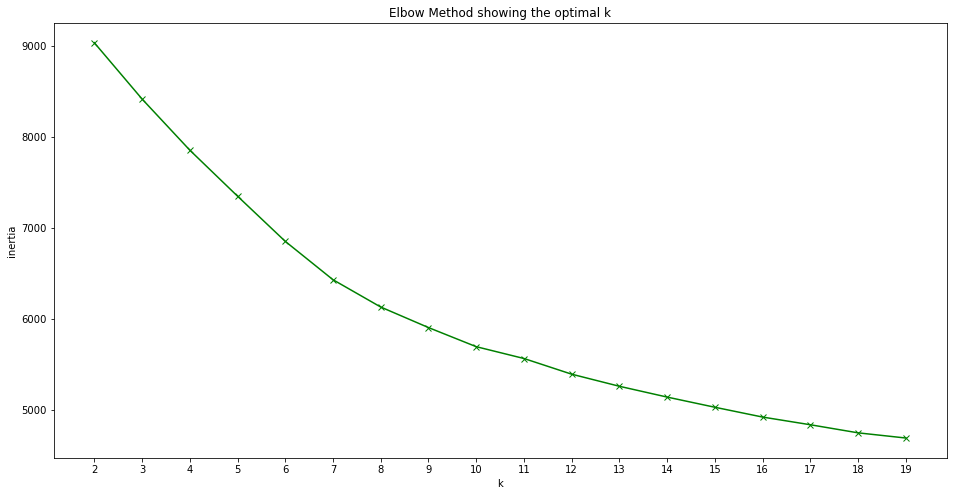

In [58]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'gx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')    

In [59]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    206
1    398
2    211
dtype: int64

In [60]:
clusters.shape

(815,)

In [61]:
kmeans.inertia_ 

8417.630364011928

In [62]:
kmeans = KMeans(n_clusters=3,
                init="random",
                n_init=50,  
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)

print(kmeans.inertia_)

8359.157298003529


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

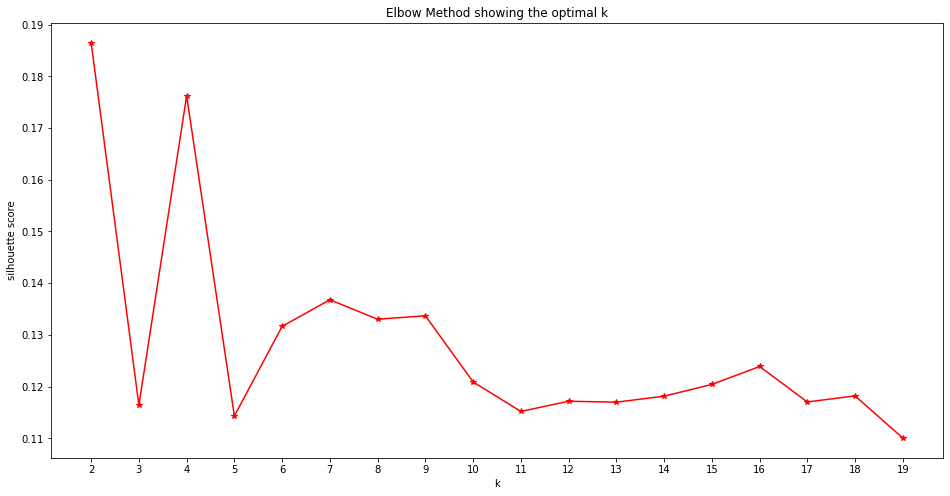

In [63]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))                        #silhouette score is prediction, maximized for 3 clusters, higher score is better


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'r*-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

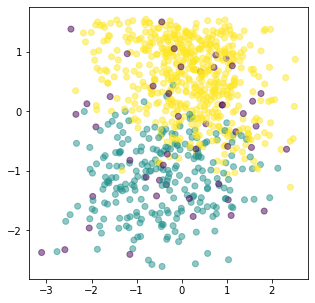

In [64]:
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X_prep)
pred = kmeans.predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

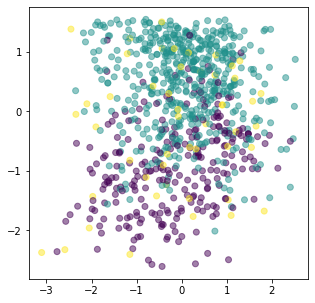

In [65]:
# ward linkage 
from sklearn import cluster, datasets
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

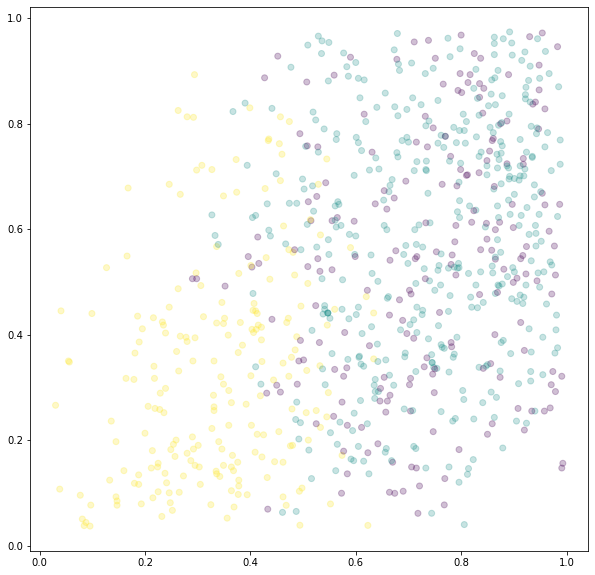

In [66]:
plt.figure(figsize=(10, 10))
plt.scatter(df_complete['energy'], df_complete['valence'], c=clusters,alpha=0.25)
plt.show()

In [68]:
df_complete['cluster'] = clusters
df_complete

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3,2
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4,2
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4,1
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4,0
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4,1
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4,0
812,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,spotify:track:536L9C0N7vhYdibCJx3cI2,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3,2
813,Blackmill,Fortune Soul,spotify:track:2eTjkXxxssJeR3u586CMkI,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4,0


In [69]:
#clusters_df = pd.concat([cluster,clusters],axis=1)

In [70]:
#clusters_df = clusters_df.rename(columns={0:'cluster'})
#clusters_df

In [71]:
#clusters_df['cluster'].value_counts()

In [72]:
#kmeans.inertia_

In [73]:
#df_final_one = pd.concat([df_names_only, clusters_df], axis=1)
df_final_one = df_complete

In [74]:
df_final_one

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3,2
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4,2
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4,1
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4,0
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4,1
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4,0
812,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,spotify:track:536L9C0N7vhYdibCJx3cI2,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3,2
813,Blackmill,Fortune Soul,spotify:track:2eTjkXxxssJeR3u586CMkI,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4,0


In [75]:
df_final_one.isna().sum()

artist              0
name                0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
cluster             0
dtype: int64

In [76]:
final_one_list = df_final_one.to_csv('C:\\Users\\eddie\\Desktop\\Ironhack\\week6\\week6 day3\\final_one_list.csv')

In [77]:
my_songs_list =  pd.read_csv('C:\\Users\\eddie\\Desktop\\Ironhack\\week6\\week6 day3\\final_one_list.csv').drop(['Unnamed: 0'],axis=1)

In [78]:
len(my_songs_list)

815

In [79]:
my_songs_list

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3,2
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4,2
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4,1
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4,0
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4,1
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4,0
812,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,spotify:track:536L9C0N7vhYdibCJx3cI2,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3,2
813,Blackmill,Fortune Soul,spotify:track:2eTjkXxxssJeR3u586CMkI,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4,0


In [80]:
topsongs = pd.read_csv('C:\\Users\\eddie\\Desktop\\Ironhack\\week6\\week6 day3\\songs_top_100.csv').drop(['Unnamed: 0'],axis=1)

In [81]:
len(topsongs)

100

In [82]:
topsongs

,title,artist
0,All Too Well (Taylor's Version),Taylor Swift
1,Easy On Me,Adele
2,Stay,The Kid LAROI & Justin Bieber
3,Industry Baby,Lil Nas X & Jack Harlow
4,Smokin Out The Window,Silk Sonic (Bruno Mars & Anderson .Paak)
...,...,...
95,Moth To A Flame,Swedish House Mafia & The Weeknd
96,'Til You Can't,Cody Johnson
97,Woman,Doja Cat
98,Take My Breath,The Weeknd


In [83]:
import pickle
# Saving scaler
#scaler_saved = 'scaler.p'
pickle.dump(scaler, open('scaler_saved.pkl', 'wb'))

# Saving model
#model_saved = 'kmeans.p'
#pickle.dump(kmeans, open('kmeans_model_saved', 'wb'))
pickle.dump(kmeans, open('kmeans_saved.pkl', 'wb'))

In [75]:
#--------------------------------------------------------gnod randomizer------------------------------------------------------------------------------------------------------
run = 'Y'
while run == 'Y':
    new_song = input("Enter a song: ")
    new_artist = input("Enter an artist: ")
    title = new_song

    if (new_song in topsongs['title'].values) & (new_artist in topsongs['artist'].values):
        while title == new_song :
            rand = randint(1, len(topsongs))
            title = topsongs['title'][rand]
            artist = topsongs['artist'][rand]
        print('This song is LIT! You might be intereted in this song: ', title,' by ',artist)   
    else:
        #try:
            new_search = sp.search(q=new_song + ' ' + new_artist, type="track", market="US", limit=1)     #andi suggested to do US search only
            #get features
            features_new = sp.audio_features(new_search['tracks']['items'][0]['uri'])
            #create features dataframe, convert to numeric 
            features_df = pd.DataFrame(features_new) 
            features_df_numeric = features_df.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
            #feed features_numeric into the scaler
            song_prepare = scaler.transform(features_df_numeric)
            cluster_predict = kmeans.predict(song_prepare)[0]
            picked = my_songs_list[my_songs_list['cluster'] == cluster_predict].sample(1)   #picked song in cluster 
            #assign title and artist, values indexed at zero, without this sample(1) will not work
            picked_title = picked['name'].values[0]
            picked_artist = picked['artist'].values[0]
            print('The GNOD algorythm picked this song for you : ', picked_title,' by ', picked_artist)
        #except:
            #print('Cannot find this song.')
    print()
    run = input('Try again? Press (Y) for yes or (N) for no.')


Enter a song:  SDS
Enter an artist:  DD


The GNOD algorythm picked this song for you :  Better Off Alone (Remastered) - 1999 Original Hit Radio  by  Alice Deejay



Try again? Press (Y) for yes or (N) for no. N


In [ ]:
#----------------------------TESTING ONLY-------------------------------------------------------------

In [ ]:
#type(picked)

In [ ]:
#cluster_predict

In [ ]:
#picked

In [ ]:
#features_new = sp.audio_features(new_search['tracks']['items'][0]['uri'])
#features_new
# song_prepare = scaler.transform(features_new)
# song_prepare

In [ ]:
#pd.DataFrame(features_new)

In [ ]:
#new_song

In [ ]:
#new_search

In [ ]:
# def what_am_i_doing_with_my_life():
#     song =  input("Please pick a song or artist and type it with upper case and lower case letters: ")
#     for i in range(len(topsongs)):
#         if topsongs['title'][i] == song:
#             rand_num = randint(0,len(topsongs))
#             return(print("You can also listen to: \"", topsongs['title'][rand_num], "\" by", topsongs['artist'][rand_num]))
#         elif topsongs['artist'][i] == song:
#             rand_num = randint(0,len(topsongs))
#             return(print("You can also to listen to: \"", topsongs['title'][rand_num], "\" by", topsongs['artist'][rand_num]))     
#     return ("Not in top 100 List!")
# what_am_i_doing_with_my_life()

In [ ]:
# def features_api(track, artist):
#     track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
#     uri = track_id["tracks"]["items"][0]['id']
#     features_api = sp.audio_features(uri)
#     return features_api